# [Computational Social Science] 

## 2-2 Data Splitting and Bias/Variance Tradeoff - Student Version

In this lab, we will introduce the fundamentals of machine learning. We will introduced supervised methods, bias/variance tradeoff, and data splitting.

## Supervised Machine Learning

Let's begin by introducing the concept of supervised learning. We're going to work with [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) on the UCI Machine Learning Repository. In supervised machine learning, we start with a structured dataset where each observation is a row and each variable is a column. The goal is to use a number of features (previously you might have called these "covariates," "independent variables," or "regressors") to train a model that predicts a target (previously you might have called these "outcome variable" or "dependent variable"). In this case, we will use information like age, education, and marital status to predict each person's income-bracket.

First let's load the data. The data is stored in a ".data" format so we'll use the pandas "read_table" method. Be sure to investigate the data carefully. What happens if we don't include a col_names argument when reading in the data?

In [3]:
# load libraries 
import pandas as pd
import numpy as np

In [5]:
# create a list of column names for the data so we can label the columns
col_names = ['age', 
             'workclass', 
             'fnlwgt',
             'education', 
             'education-num',
             'marital-status', 
             'occupation', 
             'relationship', 
             'race', 
             'sex', 
             'capital-gain',
             'capital-loss', 
             'hours-per-week',
             'native-country', 
             'income-bracket']

# read table from the data folder 
census = pd.read_table("../../data/adult.data", # refers to the subfolder called "data" to load the data
                       sep = ',',               # comma delimited file (stored as .data file not .csv)
                       names = col_names)       # applies "col_names" list to label columns

In [7]:
# Look at the first 5 rows
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

We want to use these features to predict an individual's predict income-bracket. We need to think about a few questions.

1. What features should we include?
2. What is the best model?
3. How do we evaluate the model?

First, let's think about the features. Check the different data types in our dataset. What do you notice?

In [9]:
# view data types
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-bracket    object
dtype: object

**Answer**: 

Before we pass these features into a model, we need to convert the categorical features to numerical information. So basically, we want numbers to stand in for the categories. Since our target is also categorical, we will need to transform that column as well. 

Starting with the outcome, "income-bracket," use sklearn's [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to convert the **income-bracket** column to a binary outcome (0 for "<=50k" and 1 for ">50k"). Instead of simply renaming the column, we'll call it something slighty different but informative. This way we maintain the old column in our dataset, which allows us check the new coding against the old.

In [13]:
# import library
from sklearn.preprocessing import LabelBinarizer

# create an instance of LabelBinarizer as lb so we can call it as method on the data
lb = LabelBinarizer()

# transform the variable
census['income-bracket-binary'] = lb.fit_transform(census["income-bracket"]) 

# preview data
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket,income-bracket-binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


Now let's look at the features we will use for prediction. There are a couple of different ways we could convert our categorical features to numerical ones. One simple way to do this is to convert them into dummy variables. Use the pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method to convert the categorical variables into dummy variables. *Be sure to remove the target variable (both the original and binarized versions) with* `.drop()`.

In [15]:
# create new object of features (X) by dropping our label (outcome) from the dataframe with .drop() method.
X = census. drop (['income-bracket','income-bracket-binary'], axis=1)
# which axis refers to columns?

# use the pandas "get_dummies method" to get create dummies for our categorical data
X = pd.get_dummies(data=X). astype (int)

# preview these changes in the data
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that all of our categorical variables have been converted. Instead of strings, we now either have a 0 or a 1 in their place, and new columns representing each category. 

**Question:** Take a look at the shape and structure of this new dataframe compared to the original. What can you say about these two dataframes? Is there new information, or is it presented differently? 

In [17]:
print("Dimensions of Dummy Dataframe are", X.shape)
print("Dimensions of the Original Dataframe are", census.shape)

Dimensions of Dummy Dataframe are (32561, 108)
Dimensions of the Original Dataframe are (32561, 16)


**Your Answer**: 

### Curse of Dimensionality and Sparsity

This data preprocessing step reveals two important concepts in machine learning: [**the curse of dimensionality** and **sparsity**](https://www.kaggle.com/residentmario/curse-of-dimensionality). 

- A **sparse matrix** is one filled mainly with 0's, as we see above. In geometric terms, this means that most combinations of features are totally empty. 

- The **curse of dimensionality** refers to the idea that as the number of features grow, the number of observations needed to properly model predictions grows as well. The problem is that that number of observations required grows much faster than the number of features. So, there's a fundamental trade off between increasing the number features to improve model performance, but reducing it to avoid the instability and overfitting that will occur with too few observations. This another important tradeoff at the heart of supervised machine learning. 

In the coming weeks, we will learn more about how to conceptualize and make these tradeoffs.

## Data Splitting

Another key aspect of machine learning is splitting our data. In your previous statistics classes, you likely fit regression models on an entire dataset. The problem with fitting a model this way is that models will tend to perform better on the data that they are trained on, but then perform less well on out of sample data. In some ways, the framework we will use in machine learning has grown out of this critque, but also is a result of a stronger focus on prediction. 

Remember, the error in a machine learning model comes from two sources:

**Bias**: Error arising from the difference between the predicted output and the actual output. High bias models tend to be too simple and **underfit** the dataset.

**Variance**: Error arising from modeling the noise in the output. High variance models tend to be too complex and **overfit** the dataset.

The [**bias-variance tradeoff**](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) is a fundamental concept in machine learning. The less bias in a model, the higher the variance and vice versa. [Underfitting or overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) a model makes generalizing to new data difficult. Trading off between these two sources of error is an essential part of machine learning. 

Over the next few weeks, we will explore how to deal with bias-variance tradeoff in the modeling process. Today, we'll look at how our choices in the data splitting step affect the bias-variance tradeoff as well.

In the meantime, the following visualization is helpful in separating bias and variance.

![bias_variance_tradeoff.png](../../images/bias_variance_tradeoff.png)

Image taken from blog by [Angel and Kezhan Shi](https://towardsdatascience.com/what-bias-variance-bulls-eye-diagram-really-represent-ff6fb9670993#:~:text=Relationship%20to%20Overfitting%20and%20underfitting&text=Now%20if%20we%20go%20back,high%20variance%20and%20low%20bias).

### Train/Test/Validation Split

In general, machine learning models will tend to overfit the data they are trained on. As a machine learning model becomes more complex, it learns many of the idiosyncrasies in a dataset, but this tendency will mean it generalizes poorly. To assess the extent a model is prone to this problem, and make corrections, we always split our data before training our models.

The general procedure for this is the following:
1. Randomly divide our data set into two smaller sets: one for training and one for testing
2. Train the data on the training set, changing our model along the way to increase accuracy
3. Test the data's predictions using in test set.

Scikit-learn's [test_train_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) will help here. First, separate your data into two parts: a dataframe containing the features used to make our prediction, and an array of the true targets. We already made a dataframe with our features earlier when we created dummy variables, so now we need to make a target vector.

In [19]:
# View dataset
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket,income-bracket-binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [23]:
# create dataframe with just the outcome
y = census ['income-bracket-binary']

Now, set a random seed to ensure that we all get the same results when we sample. Then, use train_test_split to create a training set that contains 80% of the original dataset and a test set with 20% of the original data. Then check the shapes of each of the new sets.

In [25]:
# import library for training-testing-splitting
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,               # specify features  
                                                    y,               # specify labels
                                                    test_size=0.2,               # set training proportional spilt
                                                    train_size=0.8)               # set testing proportional spilt

In [29]:
# print shape of each newly created dataframe
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (26048, 108)
Shape of y_train is (26048,)
Shape of X_test is (6513, 108)
Shape of y_test is (6513,)


Just as a check on the proportional splits, we can show an 80 and 20 percent spilt of the original datafame `X` match the sample size of the training and testing datasets:

In [31]:
# verify proportional splits
print("100% of original dataset", X.shape[0])
print("80% of full dataset", X.shape[0]*.8)
print("20% of full dataset", X.shape[0]*.2)

100% of original dataset 32561
80% of full dataset 26048.800000000003
20% of full dataset 6512.200000000001


### Validation Set

Because we may want to adjust our models, it is generally a good idea to save the test set until the very end and only use it once. Instead of going back and forth between the training and test set, we should instead use a validation set. 

Try using the `train_test_split` method to further split your training data so that 75% remains in training and 25% is reserved for validation. Note that this will mean the **final split is 60% train, 20% validation, and 20% test.** Check the dimensions of each.

In [33]:
# split the trainting dataset again into two validation datasets
X_train, X_validate, y_train, y_validate = train_test_split(X_train,             # specify training x
                                                            y_train,             # specify training y
                                                            train_size=0.75,             # set training proportional spilt
                                                            test_size=0.25)             # set testing proportional split

In [35]:
# use shape attribute to check out how many rows and columns you have in your train and test data
print("Shape of X train is", X_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of X_test is", X_test.shape)

Shape of X train is (19536, 108)
Shape of X_validate is (6512, 108)
Shape of X_test is (6513, 108)


Just as a check on the proportional splits, we can show a 60 and 20 percent spilt of the original datafame `X` match the sample size of the training, testing, and validating datasets:

In [37]:
# verify proportional splits
print("100% of original dataset", X.shape[0])
print("60% of full dataset", X.shape[0]*.6)
print("20% of full dataset", X.shape[0]*.2)

100% of original dataset 32561
60% of full dataset 19536.6
20% of full dataset 6512.200000000001


## Fit a Model

Now let's try to fit a model. We'll use a logistic regression and find out how accurate our model is in the validation set. We'll explore fitting multiple models and adjusting them in coming weeks, but for now we'll start with one that you're familiar with. 

See the documentation for [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to see how to train a model and predict on new data. Make sure you train the model on your train set, and predict on the validation set.

In [84]:
# load libraries
from sklearn.linear_model import LogisticRegression

# intitiate instance of logit model
log_reg = LogisticRegression(solver='liblinear')

# fit the model - learning the relationship between features (x_train) and labels (y_train)
log_model = log_reg.fit (X_train, y_train)

# pull out the predicted values and store as an object
y_pred = log_model.predict(X_validate)

Now let's visualize how we did. A common tool to see how a supervised machine algorithm performed in a classification setting is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Each cell in the confusion matrix shows the relationship between the true observations on the y-axis and the predicted observations on the x-axis. Cells along the diagonal (moving from upper right to lower right) are instances where the predictions match the true labels.

Call Scikit-Learn's `confusion_matrix` using the y_validate and y_pred variables. Have a look in the documentation at the `normalize` parameter as well, and how it influences the visualization.

In [86]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

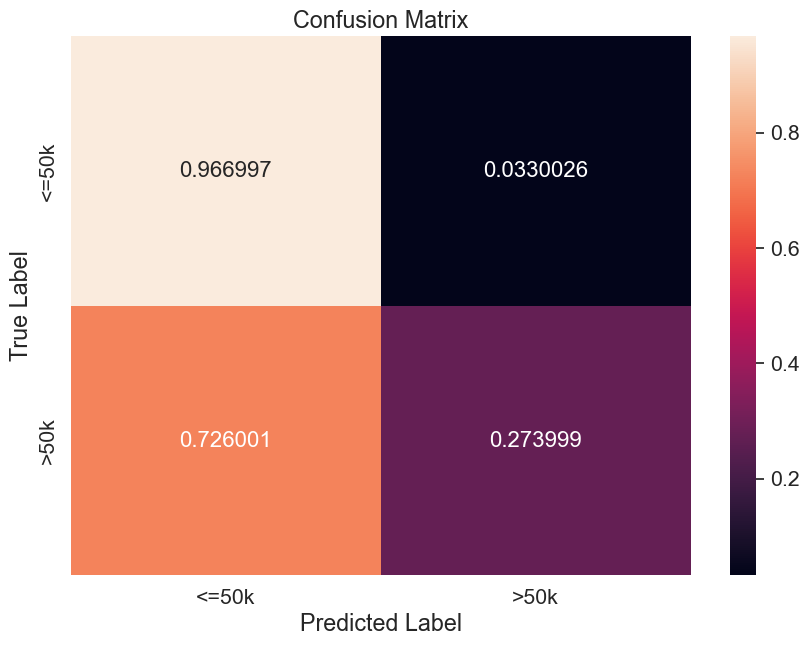

In [88]:


# specify confusion matrix
cf_matrix = confusion_matrix(y_true = y_validate,     # actual targets (ground truth)
                             y_pred = y_pred,         # estimated targets 
                             normalize = 'true')

# turn cf_matrix into a dataframe for plotting purposes
df_cm = pd.DataFrame(cf_matrix)


# label dataframe 
df_cm = df_cm.rename(index   = {0: "<=50k", 1: ">50k"}, # label rows
                     columns = {0: "<=50k", 1: ">50k"}) # label columns

# plot figure
plt.figure(figsize = (10,7))                     # set figure size
sns.set(font_scale = 1.4)                        # set label size

# specify heat map
sns.heatmap(df_cm,                               # specify dataframe                          
           annot=True,                           # display data values       
           annot_kws={"size": 16},               # format data values
           fmt='g')                              # format values as "general"      

# labels 
plt.title("Confusion Matrix")                    # label title
plt.xlabel("Predicted Label")                    # label x axis
plt.ylabel("True Label")                         # label y axis     
plt.show()                                       # show label

## Loop

**Exercise**: Using the [iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset, (see [this](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for more documentation) write a for loop that varies the training set size and visualize how performance changes as you increase the training size. What tends to happens? Use the census dataset that we've been working with so far, but it may take a while to run.

In [90]:
# load libraries 
from sklearn.datasets import load_iris

# load iris data as an array
iris = load_iris()

# create X and y objects
X_iris = iris.data[:, 0:2]        # just take the first two features
y_iris = iris.target              # just take the targets ()

# look at shape of array
iris.data.shape

(150, 4)

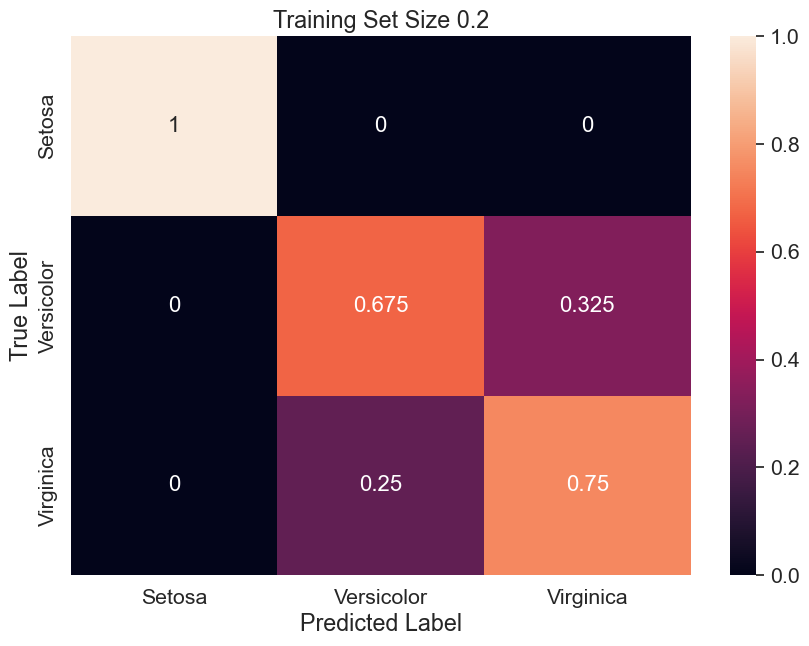

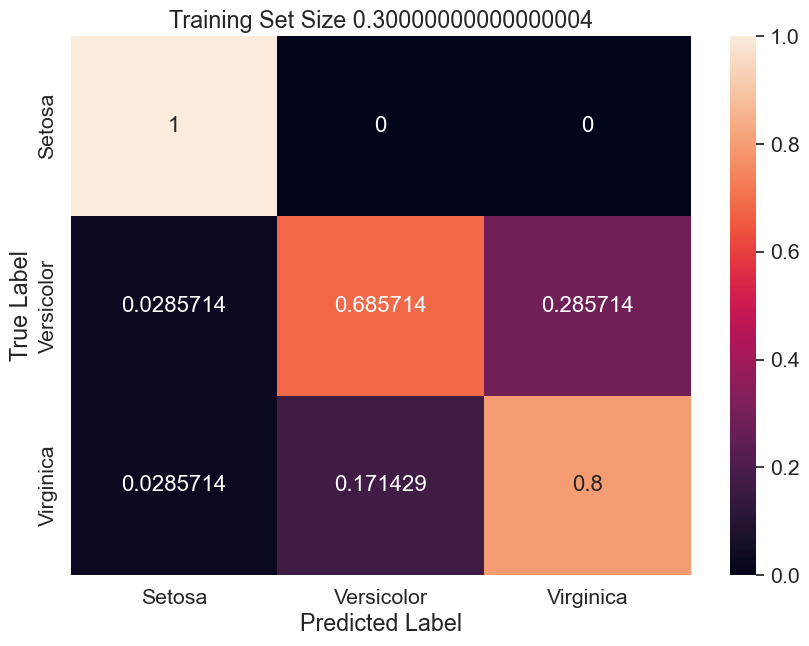

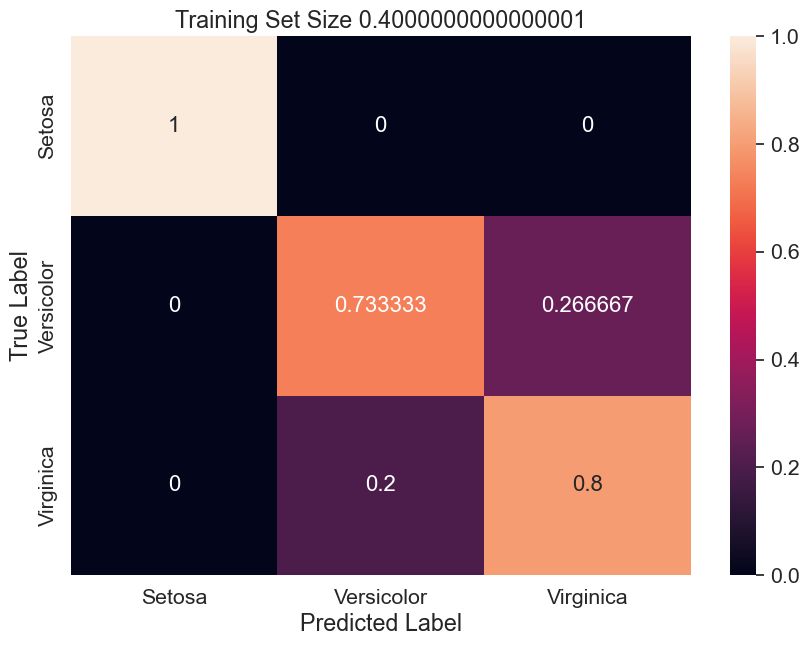

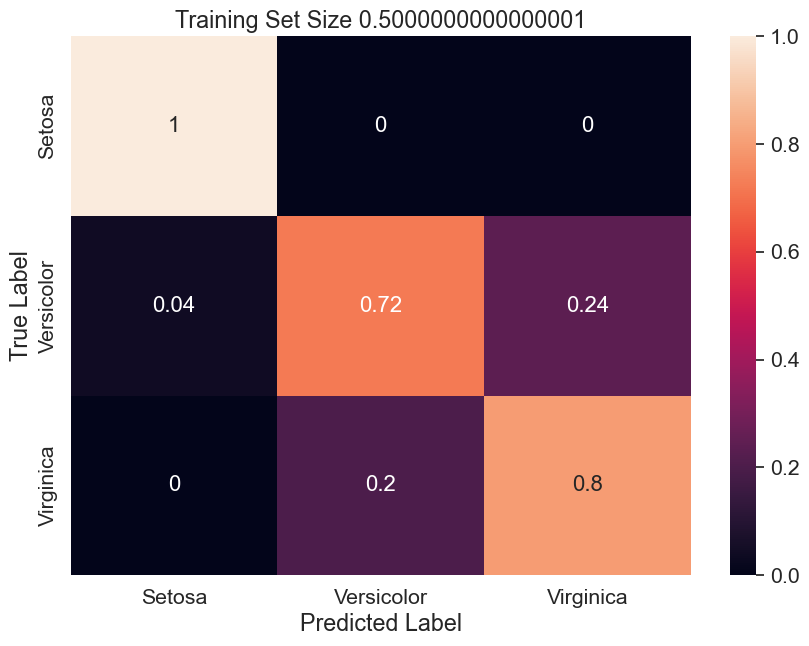

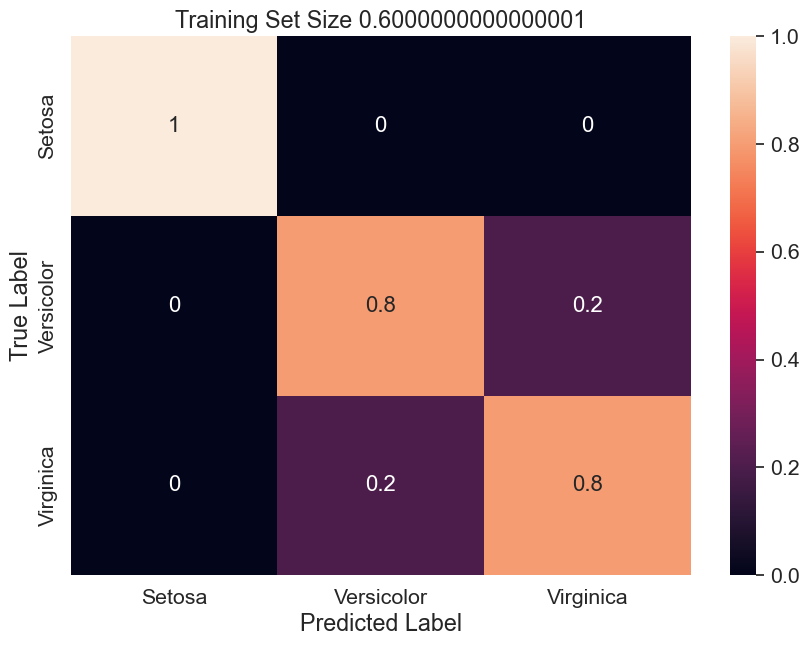

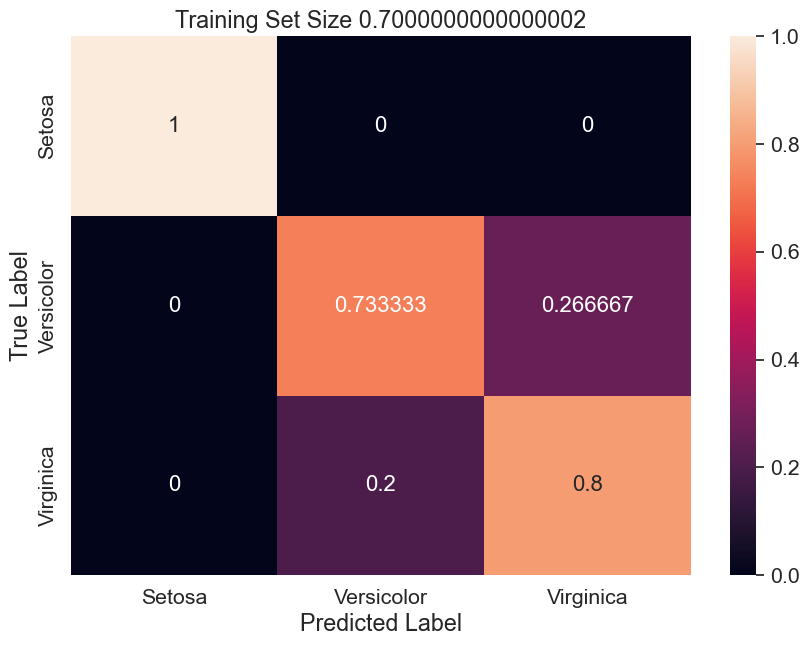

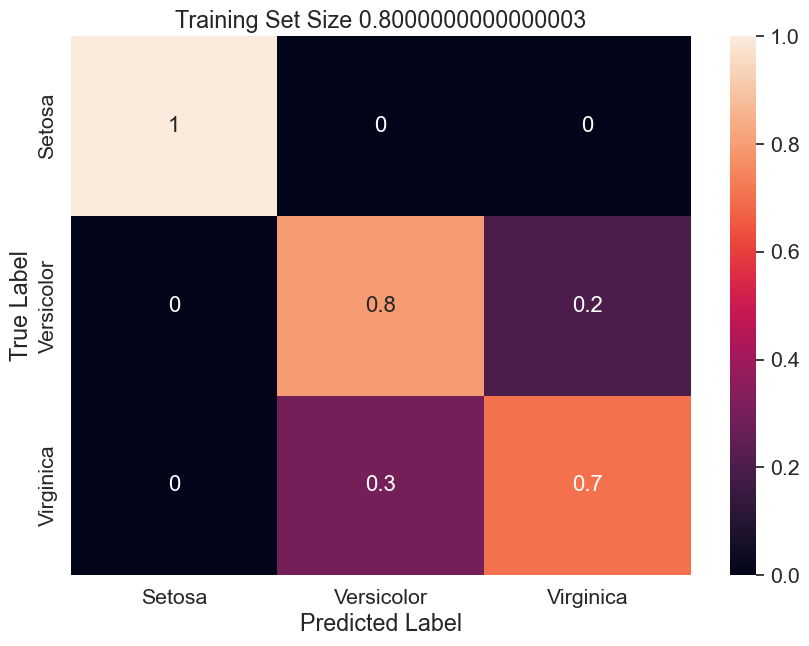

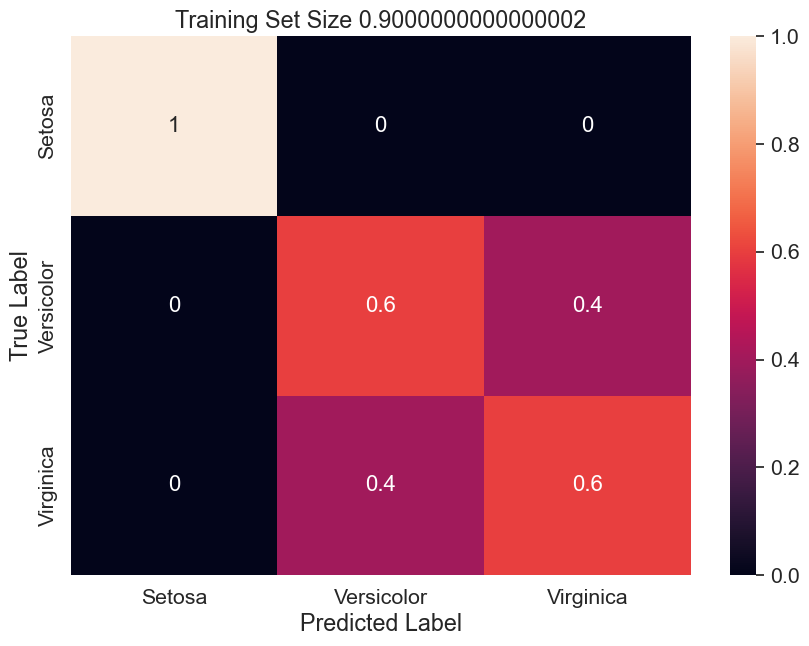

In [100]:
# set the dataset size we want to loop through as a percent
sizes = np.arange(.2, 1, .10)

# create loop
for size in sizes:
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X_iris,
                                                        y_iris,
                                                        train_size=size, # set training size
                                                        random_state=10, # set a random seed
                                                        shuffle=True,    # shuffle the data
                                                        stratify=y_iris) # stratify by outcome
        

    # create instance of Logisitic regression 
    log_reg = LogisticRegression()
    
    # fit the model
    log_model = log_reg.fit(X_train,
                            y_train)
    
    # save prediction 
    y_pred = log_model.predict(X_test)

    # specify confusion matrix
    cf_matrix = confusion_matrix(y_test,     # actual targets (ground truth)
                                 y_pred,         # estimated targets 
                                 normalize = 'true')
    
    # convert matrix to dataframe
    df_cm = pd.DataFrame(cf_matrix)

    # rename rows and columns: can find the key to this data set using the target and target_names attributes
    df_cm = df_cm.rename(index  ={0: "Setosa", 1: "Versicolor", 2: "Virginica"}, 
                         columns={0: "Setosa", 1: "Versicolor", 2: "Virginica"})

    # plot figure
    plt.figure(figsize = (10,7))                     # set figure size
    sns.set(font_scale=1.4)                          # set label size

    # specify heat map
    sns.heatmap(df_cm,                               # specify dataframe                          
               annot=True,                           # display data values       
               annot_kws={"size": 16},               # format data values
               fmt='g')                              # format values as "general"  

    # labels 
    plt.title("Training Set Size " + str(size))       # label title
    plt.xlabel("Predicted Label")                     # label x axis
    plt.ylabel("True Label")                          # label y axis     
    plt.show()                                        # show label

**Answer**: 

## Cross-Validation

As you can see, choosing the optimal train/validation/test split can be difficult. It is also prone to high variance problems as the machine learning algorithm's performance will be very dependent on the composition of the randomly sampled test split. This problem is exacerbated in small datasets especially. One way to address this problem is with [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%2C%20sometimes%20called%20rotation,to%20an%20independent%20data%20set).

The general procedure is:

1. Randomly split the data into k-folds
2. Build the model on k-1 folds, then test on the last fold
3. Record prediction error
4. Cycle until each fold has served as the test set
5. The average of the errors is the cv-error

Cross-validation has the advantage of allowing every data point to be in the test set once. By averaging the errors, the model is less sensitive to variation in the random samples, and is less prone to overfitting. Let's try with our logistic regression again, using the [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) method.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

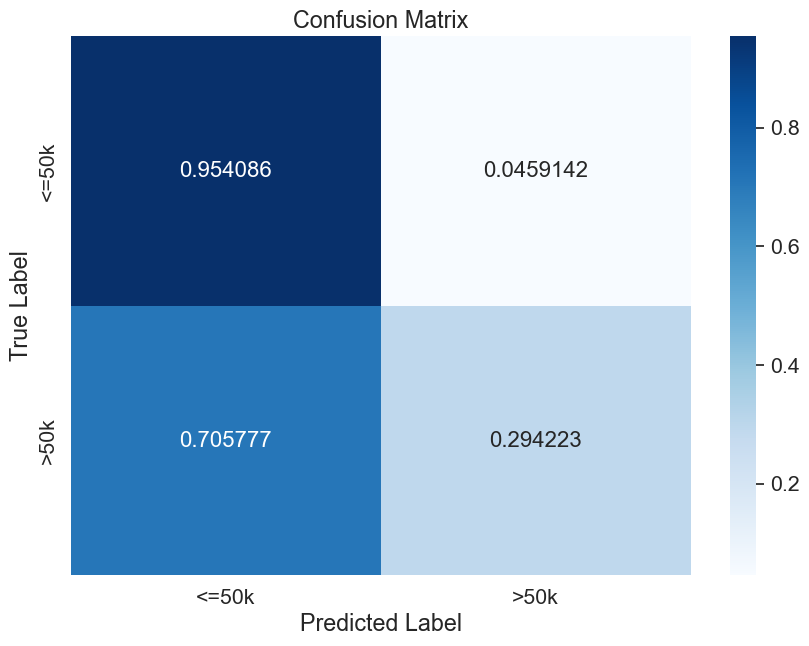

In [106]:
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# create features dataset
X = census.drop(['income-bracket', 'income-bracket-binary'], 
                axis = 1)    # drops columns                   

# get dummies
X = pd.get_dummies(X)

# create target
y = census['income-bracket-binary']

# you can re-intialize and increase the max-iterations if we want increase the # of folds
#log_reg = LogisticRegression(max_iter = 100)

# specify cross validation
log_pred = cross_val_predict(estimator = log_reg,       # specifcy object that is implementing fit 
                             X = X,                     # features
                             y = y,                     # target variable 
                             cv = 3)                    # how many folds

# specify confusion matrix
cf_matrix = confusion_matrix(y,                     # actual targets (ground truth)
                             log_pred,              # estimated targets 
                             normalize = "true")    # normalize confusion matrix over rows and columns 


# turn cf_matrix into a dataframe for plotting purposes
df_cm = pd.DataFrame(cf_matrix)


# label dataframe 
df_cm = df_cm.rename(index   = {0: "<=50k", 1: ">50k"}, # label rows
                     columns = {0: "<=50k", 1: ">50k"}) # label columns
# plot 
plt.figure(figsize = (10,7))                     # set figure size
sns.set(font_scale=1.4)                          # set label size

# specify heat map
sns.heatmap(df_cm,                               # specify dataframe                          
           annot=True,                           # display data values       
           annot_kws={"size": 16},               # format data values
           fmt='g',
           cmap='Blues')                              # format values as "general"      

# labels 
plt.title("Confusion Matrix")                    # label title
plt.xlabel("Predicted Label")                    # label x axis
plt.ylabel("True Label")                         # label y axis     
plt.show()                                       # show label                                     

---
Authored by Aniket Kesari. Updated by Tom van Nuenen in 2022.